In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | takoradi
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | tautira
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | yar-sale
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | korla
Processing Record 16 of Set 1 | baruun-urt
Processing Record 17 of Set 1 | kandrian
Processing Record 18 of Set 1 | seymchan
Processing Record 19 of Set 1 | neiafu
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | shenjiamen
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | belaya g

Processing Record 41 of Set 4 | krasnoyarskiy
Processing Record 42 of Set 4 | general roca
Processing Record 43 of Set 4 | atuona
Processing Record 44 of Set 4 | poptun
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | bone
Processing Record 47 of Set 4 | havre-saint-pierre
Processing Record 48 of Set 4 | trofors
Processing Record 49 of Set 4 | mapiripan
Processing Record 50 of Set 4 | codrington
Processing Record 1 of Set 5 | asyut
Processing Record 2 of Set 5 | otjimbingwe
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | mazatlan
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | nikolskoye
Processing Record 8 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 9 of Set 5 | dikson
Processing Record 10 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | new norfolk
Processing Record 1

Processing Record 30 of Set 8 | paranaiba
Processing Record 31 of Set 8 | lolua
City not found. Skipping...
Processing Record 32 of Set 8 | khandyga
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | dingle
Processing Record 35 of Set 8 | puerto ayacucho
Processing Record 36 of Set 8 | kolokani
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | alanya
Processing Record 40 of Set 8 | hirara
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | sidney
Processing Record 43 of Set 8 | kjollefjord
Processing Record 44 of Set 8 | santa marinella
Processing Record 45 of Set 8 | kysyl-syr
Processing Record 46 of Set 8 | morant bay
Processing Record 47 of Set 8 | peleduy
Processing Record 48 of Set 8 | chifeng
Processing Record 49 of Set 8 | waitati
Processing Record 50 of Set 8 | saldanha
Processing Record 1 of Set 9 | college
Processing Record 2 of Set 9 | mitsamiouli
Processing Record 3 of Se

Processing Record 17 of Set 12 | inhambane
Processing Record 18 of Set 12 | les cayes
Processing Record 19 of Set 12 | finnsnes
Processing Record 20 of Set 12 | luebo
Processing Record 21 of Set 12 | shakawe
Processing Record 22 of Set 12 | inverell
Processing Record 23 of Set 12 | navrongo
Processing Record 24 of Set 12 | prince rupert
Processing Record 25 of Set 12 | kyra
Processing Record 26 of Set 12 | san jose
Processing Record 27 of Set 12 | chililabombwe
Processing Record 28 of Set 12 | lata
Processing Record 29 of Set 12 | kloulklubed
Processing Record 30 of Set 12 | agadez
Processing Record 31 of Set 12 | aksarka
Processing Record 32 of Set 12 | sur
Processing Record 33 of Set 12 | godfrey
Processing Record 34 of Set 12 | phan thiet
Processing Record 35 of Set 12 | huarmey
Processing Record 36 of Set 12 | sharan
Processing Record 37 of Set 12 | grand centre
City not found. Skipping...
Processing Record 38 of Set 12 | lasa
Processing Record 39 of Set 12 | churumuco
City not fou

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Takoradi,4.8845,-1.7554,78.39,87,82,7.25,GH,2021-11-08 01:55:55
1,Punta Arenas,-53.1500,-70.9167,44.71,65,20,6.91,CL,2021-11-08 01:55:56
2,Rikitea,-23.1203,-134.9692,74.97,78,100,13.85,PF,2021-11-08 01:55:43
3,Ponta Do Sol,32.6667,-17.1000,66.83,65,14,7.25,PT,2021-11-08 01:55:56
4,Olafsvik,64.8945,-23.7142,35.20,99,100,28.61,IS,2021-11-08 01:53:10


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Takoradi,GH,2021-11-08 01:55:55,4.8845,-1.7554,78.39,87,82,7.25
1,Punta Arenas,CL,2021-11-08 01:55:56,-53.1500,-70.9167,44.71,65,20,6.91
2,Rikitea,PF,2021-11-08 01:55:43,-23.1203,-134.9692,74.97,78,100,13.85
3,Ponta Do Sol,PT,2021-11-08 01:55:56,32.6667,-17.1000,66.83,65,14,7.25
4,Olafsvik,IS,2021-11-08 01:53:10,64.8945,-23.7142,35.20,99,100,28.61
...,...,...,...,...,...,...,...,...,...
570,Niksar,TR,2021-11-08 02:12:04,40.5917,36.9517,54.16,76,91,3.60
571,Dalhousie,IN,2021-11-08 02:12:04,32.5333,75.9833,43.72,36,0,9.04
572,Hope,US,2021-11-08 02:12:05,33.6671,-93.5916,57.25,65,0,4.76
573,Innisfail,AU,2021-11-08 02:08:29,-17.5333,146.0333,95.88,72,74,8.93


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

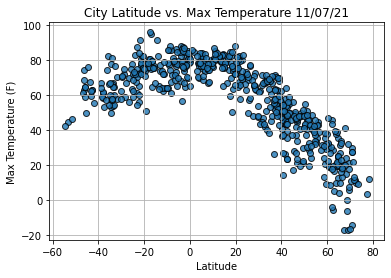

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

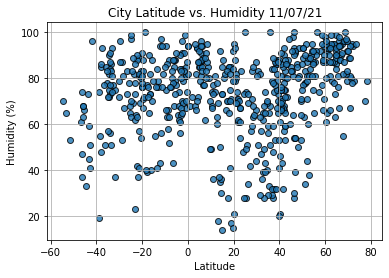

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

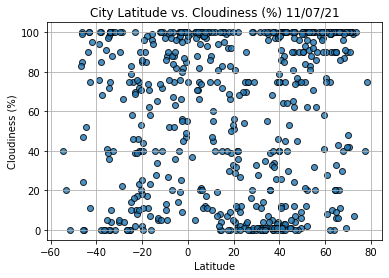

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

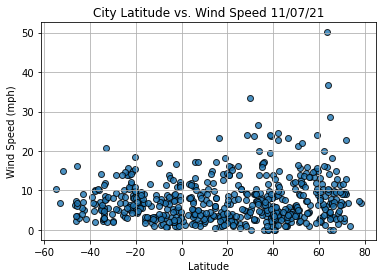

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()